# DBSCAN(Density Based Spatial Clustering of Applications with Noise)
- 밀도 기반 군집화


## parameter
##### eps
epsilon 입실론 주변 영역의 반경을 의미
##### min_samples
핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수(자기 자신 포함)

## Step
##### Core point
주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있는 데이터
##### Neighbor point
주변 영역 내에 위치한 타 데이터
##### Border point
주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만 핵심 포인트를 이웃 포인트로 갖는 데이터
##### Noise point
최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 갖지 않는 데이터

1. P1, P2가 core point일 때, 각각이 서로의 neighbor point이면, 두 군집은 하나의 군집으로 연결된다.
2. border point는 군집의 가장자리에 위치한다.
3. noise point는 데이터의 noise를 detect하는데 쓰이기도 한다.

![image](https://user-images.githubusercontent.com/17154958/50966784-6981f100-1519-11e9-8e02-892eea4b20e8.png)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
def visualize_cluster(clusterobj, df, label_name, iscenter = True) :
    
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(df[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels :
        label_cluster = df[df[label_name] == label]
        
        if label == -1 :
            cluster_legend = 'Noise'
            isNoise = True
            
        else :
            cluster_legend = 'Cluster' + str(label)
            
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

# iris data example

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.cluster import DBSCAN

#eps는 일반적으로 1이하의 값으로
dbscan = DBSCAN(eps = 0.6, min_samples=8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

In [7]:
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

-1은 noise 값! 결과적으로 두 개의 군집으로 나눔

## pca
2차원에 시각화를 위해 pca를 통해 차원의 개수를 2로 줄이겠다

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

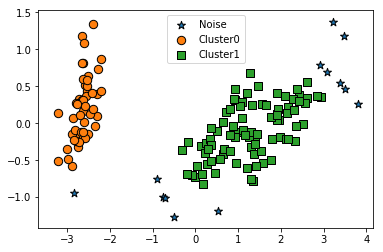

In [15]:
#별표시가 noise
visualize_cluster(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

eps의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 noise의 개수가 작아진다

In [16]:
dbscan = DBSCAN(eps = 0.8, min_samples=8)
iris_df['dbscan_cluster'] = dbscan.fit_predict(iris.data)
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64

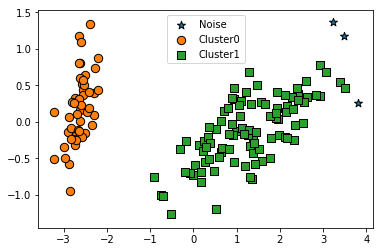

In [17]:
visualize_cluster(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

min_samples를 늘리면, border point가 되기 위해 많은 점을 포함해야 하므로, noise 개수가 늘어난다.

In [18]:
dbscan = DBSCAN(eps = 0.6, min_samples=16)
iris_df['dbscan_cluster'] = dbscan.fit_predict(iris.data)
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64

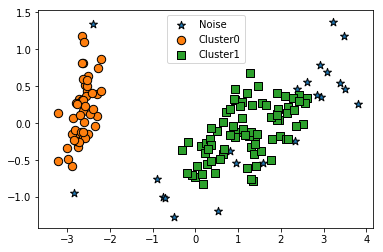

In [19]:
visualize_cluster(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

# make_circles example

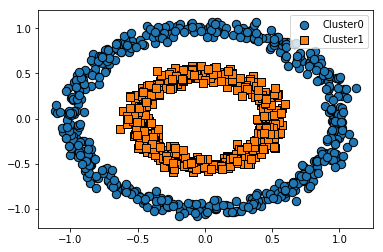

In [20]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, shuffle = True, noise = 0.05, random_state=0, factor=0.5)
cluster_df = pd.DataFrame(data = X, columns=['ftr1','ftr2'])
cluster_df['target'] = y

visualize_cluster(None, cluster_df, 'target', iscenter=False)

## K-means

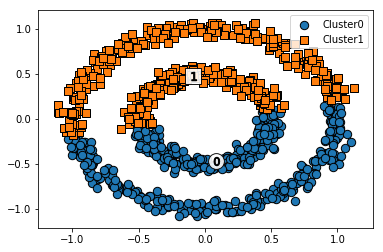

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 1000, random_state = 0)
cluster_df['kmeans_cluster'] = kmeans.fit_predict(X)

visualize_cluster(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)

## GMM

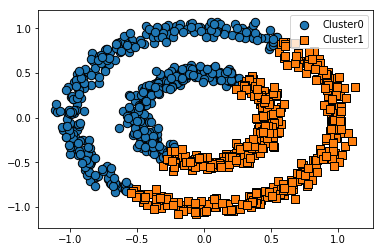

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state = 0)
cluster_df['gmm_cluster'] = gmm.fit_predict(X)

visualize_cluster(gmm, cluster_df, 'gmm_cluster', iscenter = False)

## DBSCAN

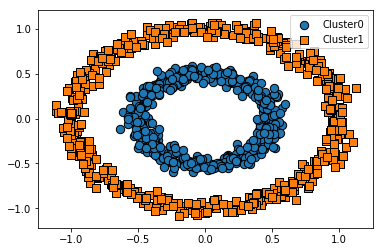

In [24]:
dbscan = DBSCAN(eps = 0.2, min_samples=10)
cluster_df['dbscan_cluster'] = dbscan.fit_predict(X)

visualize_cluster(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)